In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LinearRegression

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict


from sklearn import svm
from imblearn.over_sampling import SMOTE, ADASYN



In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])




In [3]:
def replace_outliers(X, alpha):
    num_features = X.shape[1]
    q_low = X.quantile(alpha, axis=0)
    q_up = X.quantile(1 - alpha, axis=0)
    X_new = X.values.copy()
    median = X.median(axis = 0).values.copy()
    for i in range(num_features):
        for j in range(X.shape[0]):
            if X_new[j][i] < q_low[i] or X_new[j][i] > q_up[i]:
                X_new[j][i] = median[i]
    return X_new
        
    
def comp(X, lower, upper):
    outliers = []
    for i in range(X.shape[0]):
        if np.sum(X[i] < lower) + np.sum(X[i] > upper) > 0:
            outliers.append(i)
    return outliers
 
def check_outliers(X, alpha = 0.25):
    q25 = X.quantile(alpha, axis=0)
    q75 = X.quantile(1-alpha, axis=0)
    iqr = q75 - q25
    cut_off = iqr * 1.75
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = comp(X.values, lower, upper)
    return outliers

In [4]:
np.random.seed(0)

In [5]:
X_train_load = pd.read_csv('./data/task1_9_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_9_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_9_test_X.csv',header=None, sep=' ').as_matrix()

In [6]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)


(1000, 1500)
(1000,)
(10000, 1500)


In [7]:
# X_train_load = replace_outliers(pd.DataFrame(X_train_load), 0.0141)
# X_test_load = replace_outliers(pd.DataFrame(X_test_load), 0.0141)

In [8]:
skb = SelectKBest(f_classif, k=1)
# skb = SelectKBest(mutual_info_classif, k=1)
skb.fit(X_train_load, y_train_load)


SelectKBest(k=1, score_func=<function f_classif at 0x1141ee378>)

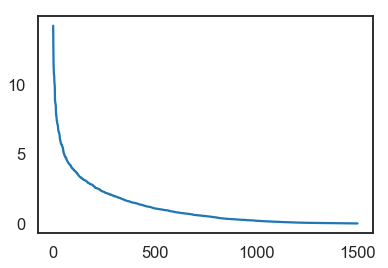

In [9]:
plt.plot(np.sort(skb.scores_)[::-1])

In [10]:
skb.k = 70

In [11]:
# X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
X = skb.transform(np.vstack([X_train_load, X_test_load]))
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)





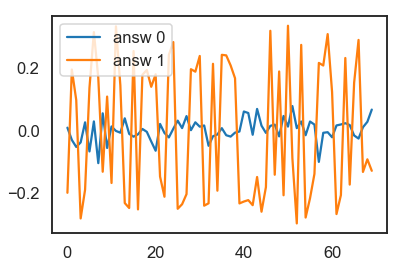

In [12]:
plt.plot(np.mean(X_train[np.where(y_train==0)], axis = 0), label = 'answ 0')
plt.plot(np.mean(X_train[np.where(y_train==1)], axis = 0), label = 'answ 1')

plt.legend(loc='best')



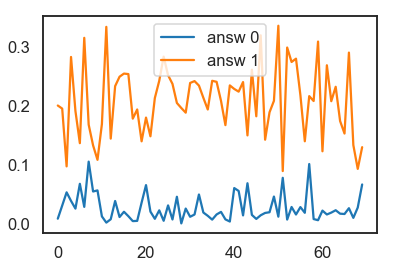

In [13]:
plt.plot(np.abs(np.mean(X_train[np.where(y_train==0)], axis = 0)), label = 'answ 0')
plt.plot(np.abs(np.mean(X_train[np.where(y_train==1)], axis = 0)), label = 'answ 1')

plt.legend(loc='best')
plt.savefig('Practise_9_FeatureMean.pdf')

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 70)
(1000,)
(10000, 70)


In [15]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-8520 -1000
148


In [16]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [17]:
X_train_new, y_train_new = ADASYN(n_neighbors=100).fit_sample(X_train, y_train)
# X_train_new = np.array(X_train)
# y_train_new = np.array(y_train)

# ind = np.random.choice(np.where(y_train == 0)[0], size = 448)
# X_train_new = np.vstack([X_train[np.where(y_train == 1)], X_train[ind]])
# y_train_new = np.hstack([y_train[np.where(y_train == 1)], y_train[ind]])

X_test_new = np.array(X_test)

In [18]:
print(X_train_new.shape, X_test_new.shape)

(1733, 70) (10000, 70)


In [19]:
print(_asy1(y_train_new, y_train_new), _asy2(y_train_new, y_train_new))
print(np.sum(y_train_new))

-8520 -1733
881


In [20]:
rho = 0.5
Predict = cross_val_predict(estimator=LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > 0.5)))

Predict_For_AUC = LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)
Predict_For_NUM = LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)






ACC 0.815926139642
AUC 0.882198792452
NUM 319
ASY1 -5446
ASY2 -950


In [21]:
rho = 0.95
Predict = cross_val_predict(estimator=LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > 0.5)))

Predict_For_ASY1 = LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)






ACC 0.628967109059
AUC 0.854012459167
NUM 643
ASY1 -7440
ASY2 -424


In [22]:
rho = 0.5
Predict = cross_val_predict(estimator=LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1] > 0.5)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1] > 0.5)))

Predict_For_ASY2 = LogisticRegression(C=10**3, class_weight={0:rho, 1:1-rho}).fit(X_train_new, y_train_new).predict(X_test_new)







ACC 0.815926139642
AUC 0.882198792452
NUM 319
ASY1 -5446
ASY2 -950


In [23]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_9_answ.csv', sep = ',')

